In [1]:
pip install pandas matplotlib seaborn scipy scikit-learn rapidfuzz whoosh tabulate colorama plotly umap-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# taking out search_df from csv
search_df = pd.read_csv('processed_game_data.csv')
search_df.set_index('name', inplace=True)
search_df.head(4)

,release_year,windows,mac,linux,price,categories_in_app_purchases,categories_stats,categories_lan_pvp,categories_co_op,categories_hdr_available,...,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
name,,,,,,,,,,,,,,,,,,,,,
Galactic Bowling,-4.051484,1,0,0,1.041603,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
Train Bandit,-1.094924,1,1,0,-0.492140,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False
Jolt Project,0.219102,1,0,0,-0.169247,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
Henosis™,-0.109404,1,1,1,-0.088523,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False


In [5]:
search_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96508 entries, Galactic Bowling to Lober Lobe
Data columns (total 91 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   release_year                                  96508 non-null  float64
 1   windows                                       96508 non-null  int64  
 2   mac                                           96508 non-null  int64  
 3   linux                                         96508 non-null  int64  
 4   price                                         96508 non-null  float64
 5   categories_in_app_purchases                   96508 non-null  int64  
 6   categories_stats                              96508 non-null  int64  
 7   categories_lan_pvp                            96508 non-null  int64  
 8   categories_co_op                              96508 non-null  int64  
 9   categories_hdr_available                      

## Doing PCA on the data to scatter plot

# **What is UMAP?**

**Uniform Manifold Approximation and Projection (UMAP)** is a dimensionality reduction technique designed for high-dimensional data. It focuses on preserving both the **local and global structure** of data, making it particularly useful for tasks like clustering, visualization, and feature exploration.

---

## **How UMAP Works**
UMAP operates in two main steps:
1. **Graph Construction**:
   - Builds a weighted k-nearest neighbors (k-NN) graph that models the local relationships in the data.
   - Uses a distance metric (e.g., Euclidean) to measure closeness between data points.
   - Creates a high-dimensional graph that emphasizes both local density and connectivity.

2. **Optimization**:
   - Projects the high-dimensional graph into a lower-dimensional space while trying to preserve the original relationships.
   - Uses a cost function to maintain the structure of the graph in lower dimensions.

---

## **Key Features**
1. **Non-Linear**: Unlike PCA, UMAP doesn't assume linear relationships between features, allowing it to handle complex, non-linear data.
2. **Scalability**: UMAP can handle very large datasets efficiently.
3. **Control**: Offers tunable hyperparameters to control trade-offs:
   - `n_neighbors`: Controls the balance between local and global structure.
   - `min_dist`: Defines how closely points in the low-dimensional representation can be placed.

---

## **Why UMAP is Different from PCA or SVD**

| Feature                 | UMAP                         | PCA                          | SVD                          |
|-------------------------|------------------------------|------------------------------|------------------------------|
| **Assumptions**          | Non-linear relationships     | Linear relationships         | Linear relationships         |
| **Preserves**            | Local & global structure     | Global variance              | Global variance              |
| **Output**               | Non-linear embeddings        | Linear projections           | Linear projections           |
| **Data Transformation**  | Non-linear transformation    | Orthogonal transformation    | Decomposition into factors   |
| **Interpretability**     | Less interpretable           | Components are interpretable | Factors are interpretable    |

---


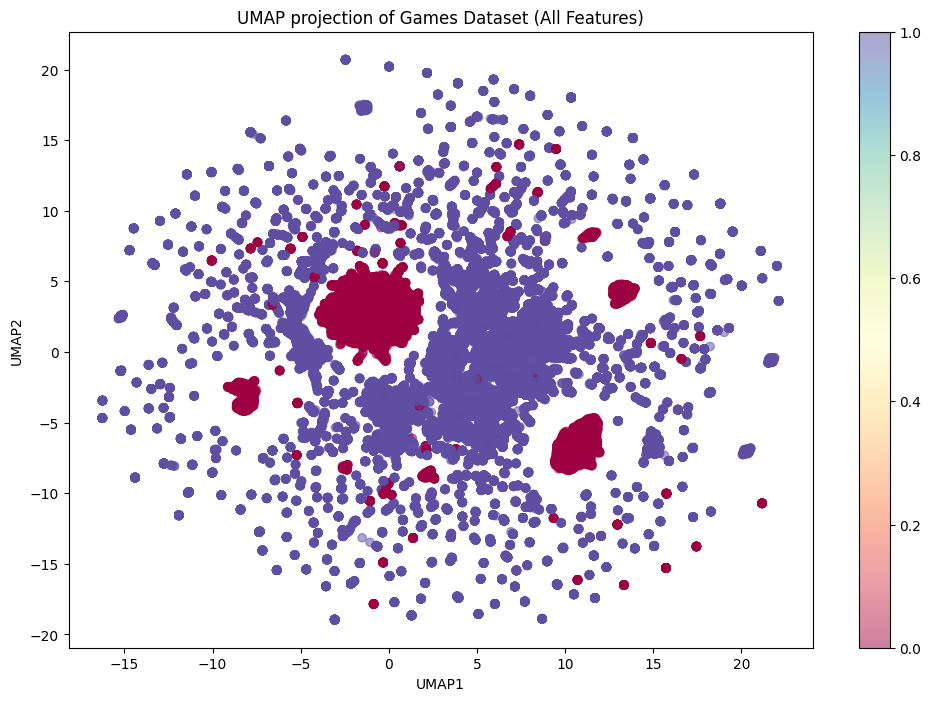

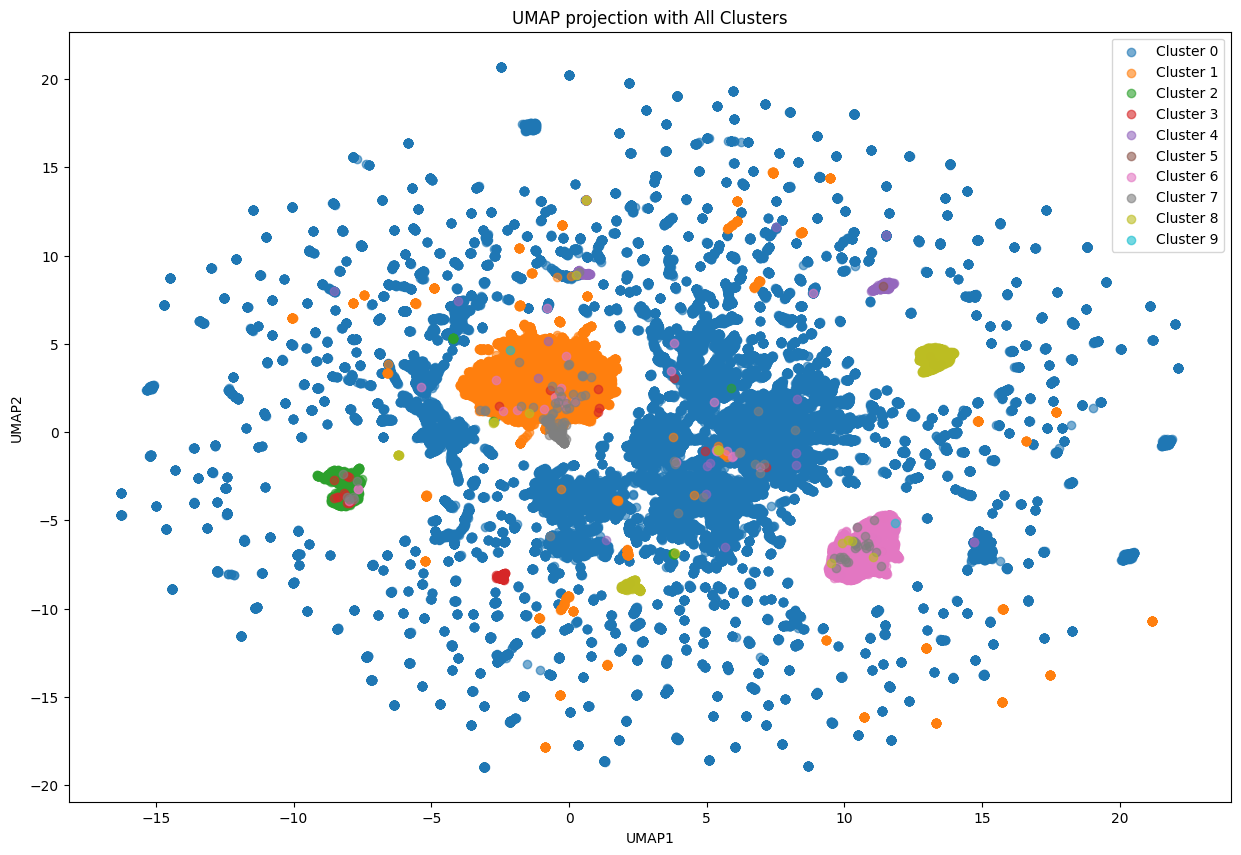

In [6]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and fit UMAP with all columns
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(search_df)

# Create a scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], 
                     c=search_df['cluster_0'].astype(int),
                     cmap='Spectral', 
                     alpha=0.5)
plt.colorbar(scatter)
plt.title('UMAP projection of Games Dataset (All Features)')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

# Visualization with all clusters
plt.figure(figsize=(15, 10))
for i in range(10):
    mask = search_df[f'cluster_{i}']
    plt.scatter(embedding[mask, 0], embedding[mask, 1], 
                label=f'Cluster {i}', 
                alpha=0.6)

plt.title('UMAP projection with All Clusters')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.show()


## doing K++ init rather than random init for more consistent results

In [15]:
# Use all columns for clustering
features = search_df.values  # Convert the entire dataframe to a NumPy array

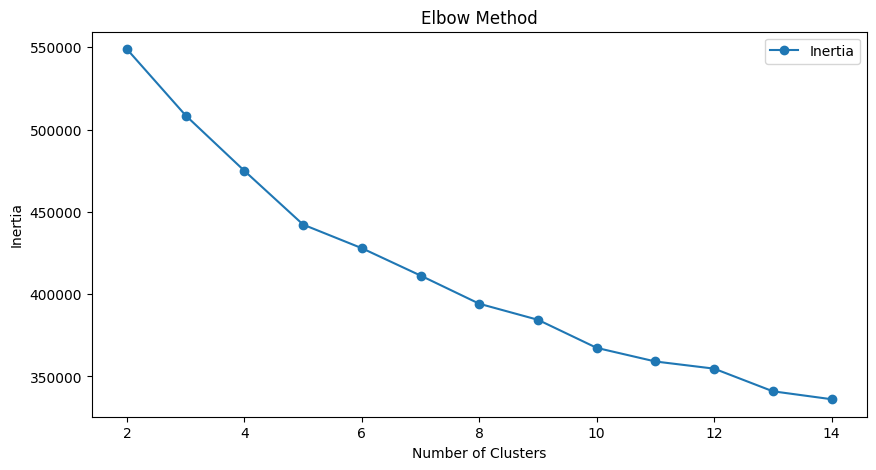

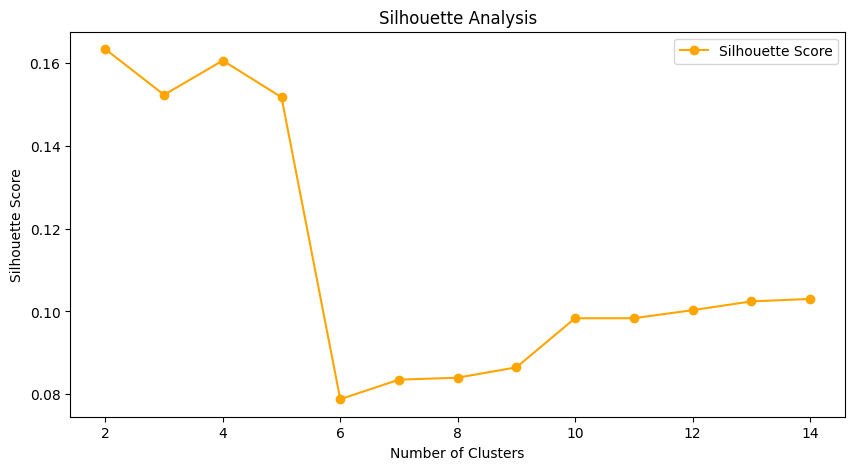

In [ ]:

# Determine the optimal number of clusters using Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
range_clusters = range(2, 15)  # Test cluster numbers from 2 to 14

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range_clusters, inertia, marker='o', label='Inertia')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range_clusters, silhouette_scores, marker='o', label='Silhouette Score', color='orange')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

5 clusters looks to be the best choice
Traning 5 clusters with eucleidean distance, mahalanois distance, manhattan distance cosine similarity

In [11]:
pip install pyclustering


     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ---------------------------------------- 2.6/2.6 MB 13.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395133 sha256=da5a7a98a09b5a3e8dd1f411df32ebd0e256430468e45a51462fc080b088b9f4
  Stored in directory: c:\users\adity\appdata\local\pip\cache\wheels\68\29\b4\131bd7deec3663cc311ab9aa64d6517c3e3ec24bcadfc32f74
Successfully built pyclustering


In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import numpy as np

# Declare global variables
global kmeans_model
global features
global features_array
global labels

def cluster_with_metric(data, n_clusters=5):
    global kmeans_model
    # Initialize KMeans with k-means++ initialization
    kmeans_model = KMeans(
        n_clusters=n_clusters,
        init='k-means++',
        n_init=10,
        random_state=42
    )
    
    # Fit and predict
    labels = kmeans_model.fit_predict(data)
    
    # Calculate metrics
    silhouette = silhouette_score(data, labels)
    calinski = calinski_harabasz_score(data, labels)
    
    return silhouette, calinski, labels

# Prepare features
features = search_df.drop(columns=[col for col in search_df.columns if 'cluster_' in col])
features_array = features.to_numpy()

# Run clustering
silhouette, calinski, labels = cluster_with_metric(features_array)

print("\nClustering Performance Metrics:")
print("=" * 60)
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {calinski:.4f}")



Clustering Performance Metrics:
Silhouette Score: 0.0814
Calinski-Harabasz Score: 8659.6749


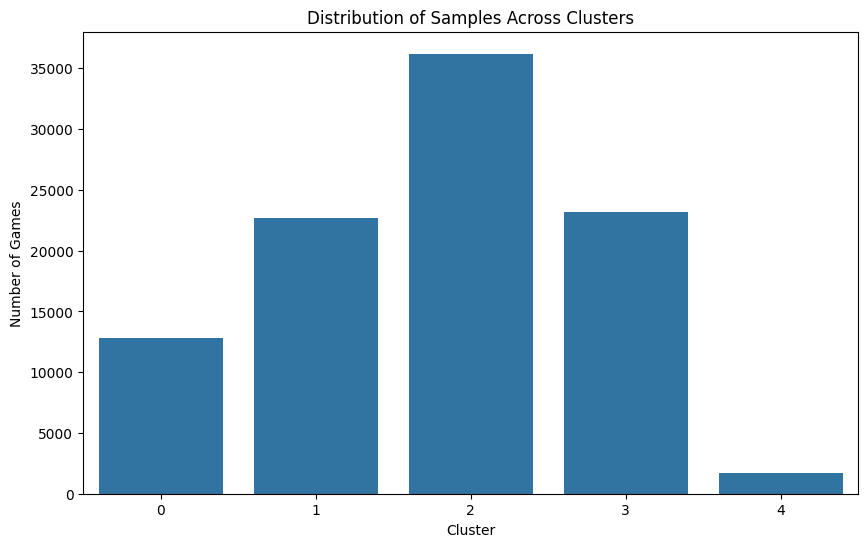

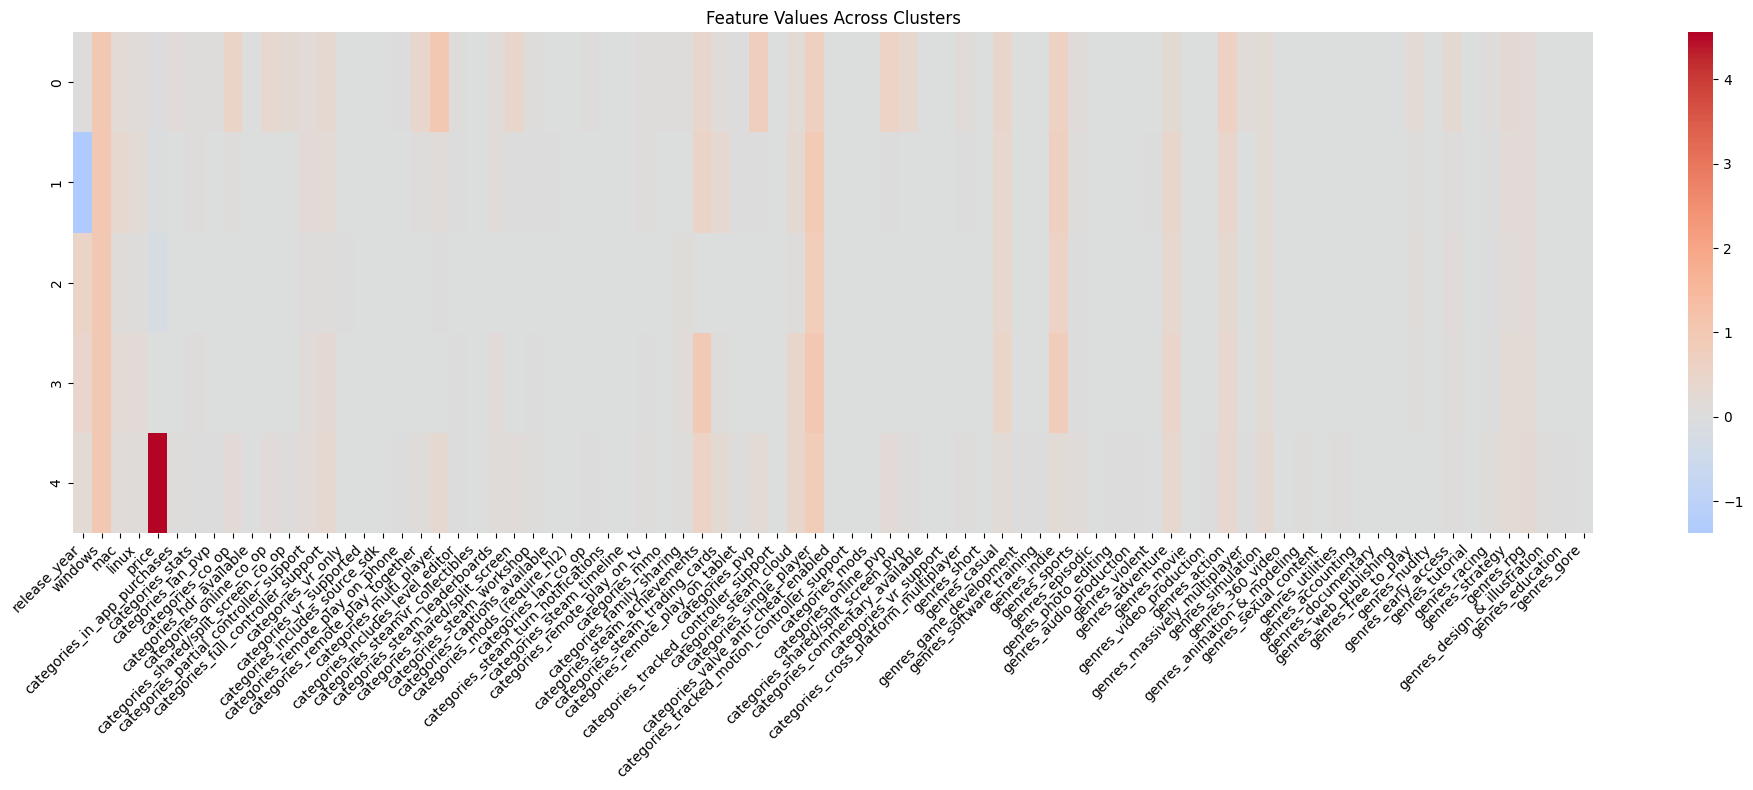

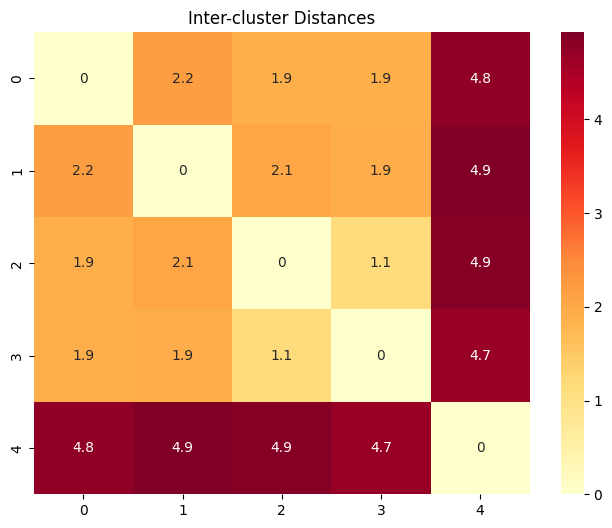

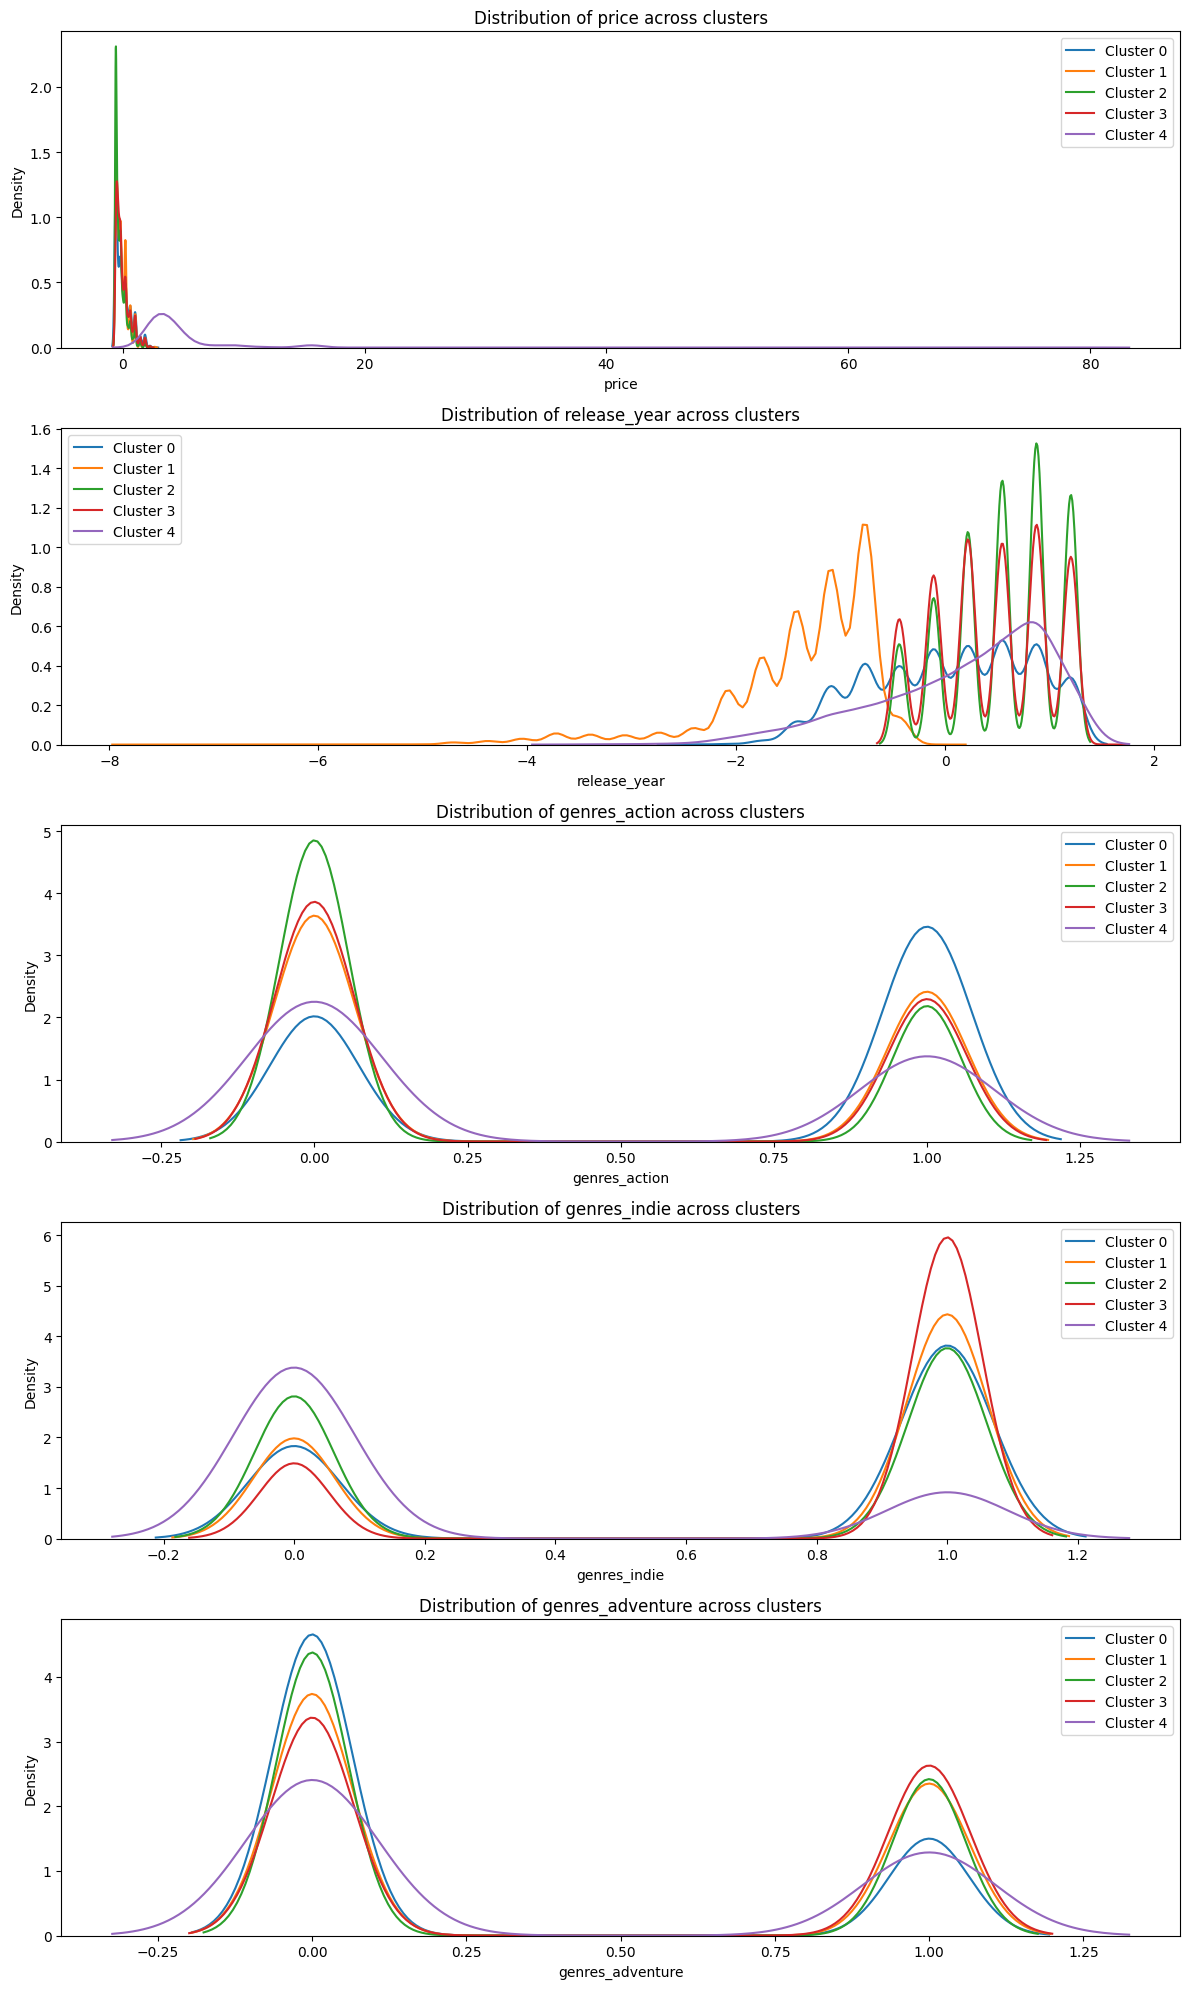


Top Distinguishing Features per Cluster:
                        Cluster 0                       Cluster 1  \
0                         windows                         windows   
1         categories_multi_player        categories_single_player   
2                  categories_pvp                    genres_indie   
3        categories_single_player   categories_steam_achievements   
4                    genres_indie                   genres_action   
5                   genres_action                genres_adventure   
6           categories_online_pvp                   genres_casual   
7                categories_co_op                             mac   
8   categories_steam_achievements  categories_steam_trading_cards   
9  categories_shared/split_screen          categories_steam_cloud   

                  Cluster 2                           Cluster 3  \
0                   windows                             windows   
1  categories_single_player            categories_single_player 

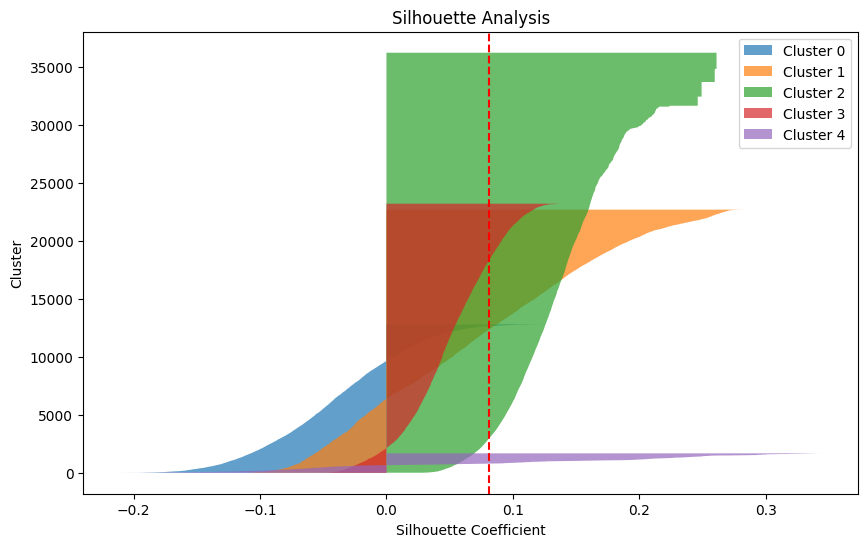

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
import pandas as pd

# 1. Cluster Size Distribution
plt.figure(figsize=(10, 6))
cluster_sizes = pd.Series(labels).value_counts().sort_index()
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values)
plt.title('Distribution of Samples Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Games')
plt.show()

# 2. Feature Importance per Cluster
cluster_centers = kmeans_model.cluster_centers_
feature_importance = pd.DataFrame(
    cluster_centers,
    columns=features.columns
)

# Heatmap of cluster centers
plt.figure(figsize=(20, 8))
sns.heatmap(feature_importance, cmap='coolwarm', center=0)
plt.title('Feature Values Across Clusters')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Inter-cluster Distances
distances = pairwise_distances(cluster_centers)
plt.figure(figsize=(8, 6))
sns.heatmap(distances, annot=True, cmap='YlOrRd')
plt.title('Inter-cluster Distances')
plt.show()

# 4. Feature Distribution within Clusters
# Select top important features
important_features = ['price', 'release_year', 'genres_action', 'genres_indie', 'genres_adventure']
fig, axes = plt.subplots(len(important_features), 1, figsize=(12, 4*len(important_features)))

for idx, feature in enumerate(important_features):
    for cluster in range(5):
        cluster_data = features[feature][labels == cluster]
        sns.kdeplot(data=cluster_data, ax=axes[idx], label=f'Cluster {cluster}')
    axes[idx].set_title(f'Distribution of {feature} across clusters')
    axes[idx].legend()
plt.tight_layout()
plt.show()

# 5. Cluster Profiles
profiles = pd.DataFrame()
for cluster in range(5):
    cluster_mask = labels == cluster
    cluster_profile = features[cluster_mask].mean()
    profiles[f'Cluster {cluster}'] = cluster_profile

# Top distinguishing features per cluster
top_features = 10
distinguishing_features = pd.DataFrame()
for cluster in range(5):
    cluster_features = profiles[f'Cluster {cluster}'].sort_values(ascending=False)[:top_features]
    distinguishing_features[f'Cluster {cluster}'] = cluster_features.index

print("\nTop Distinguishing Features per Cluster:")
print(distinguishing_features)

# 6. Silhouette Analysis
from sklearn.metrics import silhouette_samples
silhouette_vals = silhouette_samples(features_array, labels)

plt.figure(figsize=(10, 6))
for cluster in range(5):
    cluster_silhouette_vals = silhouette_vals[labels == cluster]
    y_lower = y_upper = 0
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                      alpha=0.7, label=f'Cluster {cluster}')
    y_lower += len(cluster_silhouette_vals)

plt.axvline(x=silhouette, color="red", linestyle="--")
plt.title("Silhouette Analysis")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.legend()
plt.show()


---

## GMM
trying GMM for clustering

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import numpy as np

# Initialize GMM
gmm_model = GaussianMixture(
    n_components=5,
    random_state=42,
    n_init=10
)

# Fit and predict
gmm_labels = gmm_model.fit_predict(features_array)

# Calculate metrics
gmm_silhouette = silhouette_score(features_array, gmm_labels)
gmm_calinski = calinski_harabasz_score(features_array, gmm_labels)

print("\nGMM Clustering Performance Metrics:")
print("=" * 60)
print(f"Silhouette Score: {gmm_silhouette:.4f}")
print(f"Calinski-Harabasz Score: {gmm_calinski:.4f}")

# Compare with KMeans results
print("\nComparison with KMeans:")
print("=" * 60)
print(f"{'Metric':<20} {'KMeans':<15} {'GMM':<15}")
print(f"{'Silhouette':<20} {silhouette:<15.4f} {gmm_silhouette:<15.4f}")
print(f"{'Calinski-Harabasz':<20} {calinski:<15.4f} {gmm_calinski:<15.4f}")
